    ## AuxTel test LTS-337-014 (Large Slew and Settle) - Closed Dome
   

In this notebook, we check the speed and accuracy of the slew and settle of the telescope with a certain change.  Desired specs:

| Description | Value       | Unit          |   Name     |
| :---        |    :----:   |       :----:  |       ---: |
|The pointing accuracy requirement for large slews is: | 10       | Arcsec RMS   |Aux_Tel_Lg_Slew_Abs_Pointing|
|The elevation slew size used to define the Aux_Tel_Lg_Slew_Abs_Pointing requirement is:| 60| Degrees |Aux_Tel_Lg_Elev_Slew|
|The azimuth slew size used to define the Aux_Tel_Lg_Slew_Abs_Pointing requirement is:  |90      | Degrees     |Aux_Tel_Lg_Az_Slew|
|The allotted time to perform a slew and settle by Aux_Tel_Lg_Elev_Slew and Aux_Tel_Lg_Az_Slew by the Auxiliary Telescope and meet the Aux_Tel_Lg_Slew_Abs_Pointing pointing requirement.      | 40|Seconds|Aux_Tel_Lgslew_AcqTime|


This notebook contains a closed-dome test to check AuxTel slew acquisition time for the 'large slew and settle' 
(60 degrees slew in elevation and 90 in azimuth) performed during the day on April 4th, 2022. The slews originated from 3 different 
positions in the pointing range. Results were saved in the file attached LargeSlewandSettleTime.txt and printed in the Results 
section below. 

The pointing accuracy requirement was not evaluated here and will be included in the complete upcoming AuxTel LTS-337-015 
test artifact. 

This notebook is divided into 5 sections:
1. Notebook and System Setup 
2. Small Slew and Settle Time Test 
3. System Shutdown 
4. Results  
5. Conclusion 

# Notebook and System Setup

In [73]:
import sys, time, os, asyncio

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from lsst.ts import salobj
from lsst.ts.observatory.control.auxtel.atcs import ATCS
from lsst.ts.observatory.control.auxtel.latiss import LATISS

from astropy.time import Time, TimeDelta
from astropy.coordinates import AltAz, ICRS, EarthLocation, Angle, FK5
import astropy.units as u

from lsst_efd_client import EfdClient
from lsst_efd_client import  __version__ as efdVersion

In [74]:
import logging
stream_handler = logging.StreamHandler(sys.stdout)
logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.INFO

In [75]:
# Get EFD client 
print(efdVersion)
client = EfdClient('summit_efd')

__version__ = '0.10.1'


In [76]:
#get classes and start them
domain = salobj.Domain()

In [77]:
atcs = ATCS(domain)
latiss = LATISS(domain)
await asyncio.gather(atcs.start_task, latiss.start_task)

Read historical data in 0.00 sec
Read historical data in 0.00 sec


Read historical data in 0.01 sec
Read historical data in 0.01 sec


Read historical data in 0.02 sec
Read historical data in 0.02 sec


Read historical data in 0.03 sec
Read historical data in 0.03 sec


Read historical data in 0.04 sec
Read historical data in 0.04 sec


Read historical data in 0.05 sec
Read historical data in 0.05 sec


Read historical data in 0.06 sec
Read historical data in 0.06 sec


Read historical data in 0.07 sec
Read historical data in 0.07 sec


Read historical data in 0.07 sec
Read historical data in 0.07 sec


Read historical data in 0.08 sec
Read historical data in 0.08 sec


Read historical data in 0.09 sec
Read historical data in 0.09 sec


[[None, None, None, None, None, None, None], [None, None, None, None]]

In [78]:
# enable components if required
await atcs.enable()
await latiss.enable()

Enabling all components
Enabling all components


All components in <State.ENABLED: 2>.
All components in <State.ENABLED: 2>.


Enabling all components
Enabling all components


All components in <State.ENABLED: 2>.
All components in <State.ENABLED: 2>.


In [79]:
# Disable Dome following 
await atcs.disable_dome_following()

In [82]:
# turn on ATAOS corrections just to make sure the mirror 
# is under air
tmp = await atcs.rem.ataos.cmd_enableCorrection.set_start(
    m1=True, hexapod=True, atspectrograph=False)

In [83]:
test_type = 'Large Slew and Settle - LTS-337-014'

In [85]:
# Enter the filename where to save the results.
filename = 'LargeSlew_April4th2022.txt'
with open(filename, 'a') as f:
    f.write(f'{test_type} on {time.asctime()} \n')
    f.write('Start_Time[UTC], End_Time[UTC], Start_Azimuth[deg], ' 
            'Start_Elevation[deg], Slew_time[s]') 
f.close()

# Test

## Configuration

In [99]:
# Small Slew and Settle - test name and number of iterations. 
number_of_iterations = 1

# Declare Origin Position
origin_az=100
origin_el=21
origin_rot_pa=0

# Declare offset 
delta_az= 90 # degrees
delta_el = 60 # degrees
delta_rot= 0 # degrees

print(f'This is the {test_type} test \n'
      f'The initial azimuth is {origin_az} degrees \n'
      f'The final azimuth {origin_az + delta_az} degrees \n'
      f'The initial elevation is {origin_el} degrees \n'
      f'The final elevation {origin_el + delta_el} degrees \n'
      f'Results will be saved in {filename}')

This is the Large Slew and Settle - LTS-337-014 test 
The initial azimuth is 100 degrees 
The final azimuth 190 degrees 
The initial elevation is 21 degrees 
The final elevation 81 degrees 
Results will be saved in LargeSlew_April4th2022.txt


In [100]:
#Point telescope to desired starting position
await atcs.point_azel(origin_az, origin_el, rot_tel=origin_rot_pa, wait_dome=False)

ATDome in position.
ATDome in position.


ATMCS in position: False.
ATMCS in position: False.


[Telescope] delta Alt = -000.155 deg; delta Az= +095.653 deg; delta N1 = +000.000 deg; delta N2 = +163.655 deg 
[Telescope] delta Alt = -000.155 deg; delta Az= +095.653 deg; delta N1 = +000.000 deg; delta N2 = +163.655 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +093.921 deg; delta N1 = -000.000 deg; delta N2 = +161.866 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +093.921 deg; delta N1 = -000.000 deg; delta N2 = +161.866 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +089.941 deg; delta N1 = -000.000 deg; delta N2 = +157.864 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +089.941 deg; delta N1 = -000.000 deg; delta N2 = +157.864 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +085.941 deg; delta N1 = -000.000 deg; delta N2 = +151.867 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +085.941 deg; delta N1 = -000.000 deg; delta N2 = +151.867 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +079.941 deg; delta N1 = +000.000 deg; delta N2 = +147.877 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +079.941 deg; delta N1 = +000.000 deg; delta N2 = +147.877 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +075.941 deg; delta N1 = -000.000 deg; delta N2 = +143.872 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +075.941 deg; delta N1 = -000.000 deg; delta N2 = +143.872 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +071.941 deg; delta N1 = -000.000 deg; delta N2 = +139.876 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +071.941 deg; delta N1 = -000.000 deg; delta N2 = +139.876 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +067.941 deg; delta N1 = -000.000 deg; delta N2 = +135.879 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +067.941 deg; delta N1 = -000.000 deg; delta N2 = +135.879 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +063.941 deg; delta N1 = +000.000 deg; delta N2 = +129.871 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +063.941 deg; delta N1 = +000.000 deg; delta N2 = +129.871 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +057.940 deg; delta N1 = +000.000 deg; delta N2 = +125.876 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +057.940 deg; delta N1 = +000.000 deg; delta N2 = +125.876 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +053.941 deg; delta N1 = +000.000 deg; delta N2 = +121.883 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +053.941 deg; delta N1 = +000.000 deg; delta N2 = +121.883 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +049.941 deg; delta N1 = +000.000 deg; delta N2 = +117.866 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +049.941 deg; delta N1 = +000.000 deg; delta N2 = +117.866 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +045.940 deg; delta N1 = +000.000 deg; delta N2 = +113.878 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +045.940 deg; delta N1 = +000.000 deg; delta N2 = +113.878 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +041.941 deg; delta N1 = +000.000 deg; delta N2 = +109.874 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +041.941 deg; delta N1 = +000.000 deg; delta N2 = +109.874 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +037.941 deg; delta N1 = +000.000 deg; delta N2 = +105.875 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +037.941 deg; delta N1 = +000.000 deg; delta N2 = +105.875 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +033.940 deg; delta N1 = +000.000 deg; delta N2 = +101.877 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +033.940 deg; delta N1 = +000.000 deg; delta N2 = +101.877 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +029.940 deg; delta N1 = -000.000 deg; delta N2 = +095.877 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +029.940 deg; delta N1 = -000.000 deg; delta N2 = +095.877 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +025.939 deg; delta N1 = +000.000 deg; delta N2 = +091.875 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +025.939 deg; delta N1 = +000.000 deg; delta N2 = +091.875 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +020.024 deg; delta N1 = +000.000 deg; delta N2 = +085.870 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +020.024 deg; delta N1 = +000.000 deg; delta N2 = +085.870 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +016.236 deg; delta N1 = +000.000 deg; delta N2 = +083.874 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +016.236 deg; delta N1 = +000.000 deg; delta N2 = +083.874 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +014.420 deg; delta N1 = +000.000 deg; delta N2 = +079.878 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +014.420 deg; delta N1 = +000.000 deg; delta N2 = +079.878 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +009.435 deg; delta N1 = -000.000 deg; delta N2 = +075.875 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +009.435 deg; delta N1 = -000.000 deg; delta N2 = +075.875 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +006.605 deg; delta N1 = -000.000 deg; delta N2 = +071.878 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +006.605 deg; delta N1 = -000.000 deg; delta N2 = +071.878 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +004.256 deg; delta N1 = -000.000 deg; delta N2 = +067.874 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +004.256 deg; delta N1 = -000.000 deg; delta N2 = +067.874 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +002.441 deg; delta N1 = -000.000 deg; delta N2 = +063.881 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +002.441 deg; delta N1 = -000.000 deg; delta N2 = +063.881 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +001.168 deg; delta N1 = -000.000 deg; delta N2 = +059.872 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +001.168 deg; delta N1 = -000.000 deg; delta N2 = +059.872 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +000.408 deg; delta N1 = +000.000 deg; delta N2 = +055.871 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +000.408 deg; delta N1 = +000.000 deg; delta N2 = +055.871 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.071 deg; delta N1 = +000.000 deg; delta N2 = +051.878 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.071 deg; delta N1 = +000.000 deg; delta N2 = +051.878 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +000.013 deg; delta N1 = +000.000 deg; delta N2 = +049.880 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +000.013 deg; delta N1 = +000.000 deg; delta N2 = +049.880 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +045.870 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +045.870 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +039.872 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +039.872 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +037.867 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +037.867 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +033.883 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +033.883 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +029.866 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +029.866 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +023.881 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +023.881 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +019.957 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +019.957 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +016.176 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +016.176 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +010.948 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +010.948 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +006.551 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +006.551 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +004.209 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +004.209 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = +001.708 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = +001.708 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +000.705 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +000.705 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = +000.395 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = +000.395 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +000.012 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +000.012 deg 


ATMCS in position: True.
ATMCS in position: True.


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -000.000 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -000.000 deg 


In [101]:
#Convert AZ/EL coordinates to RA/DEC
## Of the origin position
ra_dec_origin = atcs.radec_from_azel(az = origin_az, el=origin_el)
print(f'Origin Position is AZ {origin_az:0.3f} deg and EL {origin_el:0.3f} deg ' 
      f'which is {ra_dec_origin}')

## Of the target
target_az = origin_az + delta_az
target_el = origin_el + delta_el
ra_dec_target = atcs.radec_from_azel(az = target_az, el=target_el)
print(f'Target Position is AZ {target_az:0.3f} deg and EL {target_el:0.3f} deg' 
      f'which is {ra_dec_target}')


print('Starting Test')

# Starting test
start_end_pairs = []

n = 0
while n < number_of_iterations: 
    
    await atcs.stop_tracking()

    # Slew to starting position
    print(f'Slew to origin position RA {ra_dec_origin.ra:0.3f} and '
          f'DEC {ra_dec_origin.dec:0.3f}')

    await atcs.slew_icrs(ra=str(ra_dec_origin.ra), dec=str(ra_dec_origin.dec), 
                         rot=0.0,slew_timeout=240., stop_before_slew=False, 
                         wait_settle=True)


    print('Track for 1s')
    await asyncio.sleep(1)
    
    # A quick image to check pointing
    #image_origin = await latiss.take_engtest(exptime=5, n=1)

    # Now slew to target
    print(f'Slew to target with coordinates {ra_dec_target.ra:0.3f} and '
          f'{ra_dec_target.dec:0.3f}')

    start_time_target = Time(Time.now(), format='fits', scale='utc')

    await atcs.slew_icrs(ra=str(ra_dec_target.ra), dec=str(ra_dec_target.dec),
                         rot=delta_rot, slew_timeout=240., stop_before_slew=False, 
                         wait_settle=True)
    end_time_target = Time(Time.now(), format='fits', scale='utc')
    slew_time_target = TimeDelta(end_time_target - start_time_target, 
                                 format='sec').value
    print(f'Time to slew is {slew_time_target:0.3f} seconds')
    
    await asyncio.sleep(1)
    #image_target = await latiss.take_engtest(exptime=5, n=1)
    
    pair_target = [start_time_target, 
                   end_time_target, 
                   round(slew_time_target,3)]
                   #image_origin, image_target]
    start_end_pairs.append(pair_target)
    

    # Repeat the slew test going back to origin position

    print('Slew back to origin')
    start_time_origin = Time(Time.now(), format='fits', scale='utc')
    await atcs.slew_icrs(ra=str(ra_dec_origin.ra), dec=str(ra_dec_origin.dec), 
                         rot=0.0,slew_timeout=240., stop_before_slew=False, 
                         wait_settle=True)

    end_time_origin = Time(Time.now(), format='fits', scale='utc')
    slew_time_origin = TimeDelta(end_time_origin - start_time_origin, 
                                 format='sec').value
    print(f'Time to slew is {slew_time_origin:0.3f} seconds')
    
    await asyncio.sleep(1)
    #image_origin2 = await latiss.take_engtest(exptime=20, n=1)
    
    pair_origin = [start_time_origin, 
                   end_time_origin, 
                   round(slew_time_origin,3)]
                  #image_target, image_origin2]
    start_end_pairs.append(pair_origin)

    
    n=n+1
    
    

Origin Position is AZ 100.000 deg and EL 21.000 deg which is <ICRS Coordinate: (ra, dec) in deg
    (136.54543818, -18.60519154)>
Target Position is AZ 190.000 deg and EL 81.000 degwhich is <ICRS Coordinate: (ra, dec) in deg
    (58.52665408, -39.1539479)>
Starting Test
Slew to origin position RA 136.545 deg and DEC -18.605 deg


ATDome in position.
ATDome in position.


Dome following disabled and check dome enabled. Disabling dome check.
Dome following disabled and check dome enabled. Disabling dome check.


[Telescope] delta Alt = +000.093 deg; delta Az= -000.062 deg; delta N1 = -000.000 deg; delta N2 = +137.176 deg 
[Telescope] delta Alt = +000.093 deg; delta Az= -000.062 deg; delta N1 = -000.000 deg; delta N2 = +137.176 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= +000.002 deg; delta N1 = +000.000 deg; delta N2 = +136.781 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= +000.002 deg; delta N1 = +000.000 deg; delta N2 = +136.781 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.001 deg; delta N1 = +000.000 deg; delta N2 = +131.304 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.001 deg; delta N1 = +000.000 deg; delta N2 = +131.304 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = -000.000 deg; delta N2 = +129.311 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = -000.000 deg; delta N2 = +129.311 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +125.316 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +125.316 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +119.318 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +119.318 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +113.335 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +113.335 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +107.329 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +107.329 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +101.351 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +101.351 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = -000.000 deg; delta N2 = +099.349 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = -000.000 deg; delta N2 = +099.349 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +095.361 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +095.361 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +091.361 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +091.361 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +085.372 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +085.372 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = -000.000 deg; delta N2 = +083.382 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = -000.000 deg; delta N2 = +083.382 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +079.382 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +079.382 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +073.393 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +073.393 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +069.402 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +069.402 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +065.401 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +065.401 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +061.407 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +061.407 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +057.410 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +057.410 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = +000.000 deg; delta N2 = +055.424 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = +000.000 deg; delta N2 = +055.424 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +049.413 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +049.413 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +043.440 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +043.440 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = -000.000 deg; delta N2 = +041.442 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = -000.000 deg; delta N2 = +041.442 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +035.443 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +035.443 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +029.456 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +029.456 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +023.457 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +023.457 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = -000.000 deg; delta N2 = +021.502 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = -000.000 deg; delta N2 = +021.502 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +015.790 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +015.790 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +012.259 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +012.259 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +009.071 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +009.071 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +005.073 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +005.073 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +002.250 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +002.250 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +001.039 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +001.039 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +000.345 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = +000.345 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +000.004 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = -000.000 deg; delta N2 = +000.004 deg 


ATMCS in position: True.
ATMCS in position: True.


[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = -000.003 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.000 deg; delta N1 = +000.000 deg; delta N2 = -000.003 deg 
Track for 1s
Slew to target with coordinates 58.527 deg and -39.154 deg


ATDome in position.
ATDome in position.


Dome following disabled and check dome enabled. Disabling dome check.
Dome following disabled and check dome enabled. Disabling dome check.


[Telescope] delta Alt = +059.605 deg; delta Az= +091.989 deg; delta N1 = -000.000 deg; delta N2 = -069.558 deg 
[Telescope] delta Alt = +059.605 deg; delta Az= +091.989 deg; delta N1 = -000.000 deg; delta N2 = -069.558 deg 


ATMCS in position: False.
ATMCS in position: False.


[Telescope] delta Alt = +058.009 deg; delta Az= +091.572 deg; delta N1 = -000.000 deg; delta N2 = -069.155 deg 
[Telescope] delta Alt = +058.009 deg; delta Az= +091.572 deg; delta N1 = -000.000 deg; delta N2 = -069.155 deg 


[Telescope] delta Alt = +054.031 deg; delta Az= +088.083 deg; delta N1 = -000.000 deg; delta N2 = -065.708 deg 
[Telescope] delta Alt = +054.031 deg; delta Az= +088.083 deg; delta N1 = -000.000 deg; delta N2 = -065.708 deg 


[Telescope] delta Alt = +050.033 deg; delta Az= +084.121 deg; delta N1 = -000.000 deg; delta N2 = -059.757 deg 
[Telescope] delta Alt = +050.033 deg; delta Az= +084.121 deg; delta N1 = -000.000 deg; delta N2 = -059.757 deg 


[Telescope] delta Alt = +046.030 deg; delta Az= +080.181 deg; delta N1 = +000.000 deg; delta N2 = -057.827 deg 
[Telescope] delta Alt = +046.030 deg; delta Az= +080.181 deg; delta N1 = +000.000 deg; delta N2 = -057.827 deg 


[Telescope] delta Alt = +042.028 deg; delta Az= +076.202 deg; delta N1 = +000.000 deg; delta N2 = -053.841 deg 
[Telescope] delta Alt = +042.028 deg; delta Az= +076.202 deg; delta N1 = +000.000 deg; delta N2 = -053.841 deg 


[Telescope] delta Alt = +038.028 deg; delta Az= +072.243 deg; delta N1 = +000.000 deg; delta N2 = -049.886 deg 
[Telescope] delta Alt = +038.028 deg; delta Az= +072.243 deg; delta N1 = +000.000 deg; delta N2 = -049.886 deg 


[Telescope] delta Alt = +036.028 deg; delta Az= +070.281 deg; delta N1 = -000.000 deg; delta N2 = -045.931 deg 
[Telescope] delta Alt = +036.028 deg; delta Az= +070.281 deg; delta N1 = -000.000 deg; delta N2 = -045.931 deg 


[Telescope] delta Alt = +030.023 deg; delta Az= +064.322 deg; delta N1 = -000.000 deg; delta N2 = -039.985 deg 
[Telescope] delta Alt = +030.023 deg; delta Az= +064.322 deg; delta N1 = -000.000 deg; delta N2 = -039.985 deg 


[Telescope] delta Alt = +024.028 deg; delta Az= +058.383 deg; delta N1 = +000.000 deg; delta N2 = -034.050 deg 
[Telescope] delta Alt = +024.028 deg; delta Az= +058.383 deg; delta N1 = +000.000 deg; delta N2 = -034.050 deg 


[Telescope] delta Alt = +020.096 deg; delta Az= +054.442 deg; delta N1 = +000.000 deg; delta N2 = -032.126 deg 
[Telescope] delta Alt = +020.096 deg; delta Az= +054.442 deg; delta N1 = +000.000 deg; delta N2 = -032.126 deg 


[Telescope] delta Alt = +016.301 deg; delta Az= +050.462 deg; delta N1 = +000.000 deg; delta N2 = -028.143 deg 
[Telescope] delta Alt = +016.301 deg; delta Az= +050.462 deg; delta N1 = +000.000 deg; delta N2 = -028.143 deg 


[Telescope] delta Alt = +012.733 deg; delta Az= +046.501 deg; delta N1 = +000.000 deg; delta N2 = -024.188 deg 
[Telescope] delta Alt = +012.733 deg; delta Az= +046.501 deg; delta N1 = +000.000 deg; delta N2 = -024.188 deg 


[Telescope] delta Alt = +009.481 deg; delta Az= +042.541 deg; delta N1 = +000.000 deg; delta N2 = -018.381 deg 
[Telescope] delta Alt = +009.481 deg; delta Az= +042.541 deg; delta N1 = +000.000 deg; delta N2 = -018.381 deg 


[Telescope] delta Alt = +006.636 deg; delta Az= +038.601 deg; delta N1 = +000.000 deg; delta N2 = -016.541 deg 
[Telescope] delta Alt = +006.636 deg; delta Az= +038.601 deg; delta N1 = +000.000 deg; delta N2 = -016.541 deg 


[Telescope] delta Alt = +004.282 deg; delta Az= +034.622 deg; delta N1 = +000.000 deg; delta N2 = -011.282 deg 
[Telescope] delta Alt = +004.282 deg; delta Az= +034.622 deg; delta N1 = +000.000 deg; delta N2 = -011.282 deg 


[Telescope] delta Alt = +002.457 deg; delta Az= +030.680 deg; delta N1 = +000.000 deg; delta N2 = -009.751 deg 
[Telescope] delta Alt = +002.457 deg; delta Az= +030.680 deg; delta N1 = +000.000 deg; delta N2 = -009.751 deg 


[Telescope] delta Alt = +001.174 deg; delta Az= +026.698 deg; delta N1 = +000.000 deg; delta N2 = -005.591 deg 
[Telescope] delta Alt = +001.174 deg; delta Az= +026.698 deg; delta N1 = +000.000 deg; delta N2 = -005.591 deg 


[Telescope] delta Alt = +000.195 deg; delta Az= +020.813 deg; delta N1 = +000.000 deg; delta N2 = -002.591 deg 
[Telescope] delta Alt = +000.195 deg; delta Az= +020.813 deg; delta N1 = +000.000 deg; delta N2 = -002.591 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= +015.189 deg; delta N1 = +000.000 deg; delta N2 = -000.803 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= +015.189 deg; delta N1 = +000.000 deg; delta N2 = -000.803 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= +010.125 deg; delta N1 = +000.000 deg; delta N2 = -000.070 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= +010.125 deg; delta N1 = +000.000 deg; delta N2 = -000.070 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= +005.920 deg; delta N1 = -000.000 deg; delta N2 = -000.002 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= +005.920 deg; delta N1 = -000.000 deg; delta N2 = -000.002 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +003.723 deg; delta N1 = -000.000 deg; delta N2 = +000.020 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +003.723 deg; delta N1 = -000.000 deg; delta N2 = +000.020 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= +002.076 deg; delta N1 = -000.000 deg; delta N2 = -000.025 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +002.076 deg; delta N1 = -000.000 deg; delta N2 = -000.025 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= +000.927 deg; delta N1 = -000.000 deg; delta N2 = -000.003 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= +000.927 deg; delta N1 = -000.000 deg; delta N2 = -000.003 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= +000.289 deg; delta N1 = +000.000 deg; delta N2 = -000.003 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= +000.289 deg; delta N1 = +000.000 deg; delta N2 = -000.003 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= +000.036 deg; delta N1 = +000.000 deg; delta N2 = +000.020 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= +000.036 deg; delta N1 = +000.000 deg; delta N2 = +000.020 deg 


ATMCS in position: True.
ATMCS in position: True.


[Telescope] delta Alt = +000.001 deg; delta Az= +000.003 deg; delta N1 = -000.000 deg; delta N2 = -000.003 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= +000.003 deg; delta N1 = -000.000 deg; delta N2 = -000.003 deg 
Time to slew is 61.751 seconds
Slew back to origin


ATDome in position.
ATDome in position.


Dome following disabled and check dome enabled. Disabling dome check.
Dome following disabled and check dome enabled. Disabling dome check.


ATMCS in position: False.
ATMCS in position: False.


[Telescope] delta Alt = -059.330 deg; delta Az= -093.344 deg; delta N1 = -000.000 deg; delta N2 = +071.184 deg 
[Telescope] delta Alt = -059.330 deg; delta Az= -093.344 deg; delta N1 = -000.000 deg; delta N2 = +071.184 deg 


[Telescope] delta Alt = -057.257 deg; delta Az= -092.673 deg; delta N1 = -000.000 deg; delta N2 = +070.513 deg 
[Telescope] delta Alt = -057.257 deg; delta Az= -092.673 deg; delta N1 = -000.000 deg; delta N2 = +070.513 deg 


[Telescope] delta Alt = -053.258 deg; delta Az= -088.962 deg; delta N1 = +000.000 deg; delta N2 = +066.791 deg 
[Telescope] delta Alt = -053.258 deg; delta Az= -088.962 deg; delta N1 = +000.000 deg; delta N2 = +066.791 deg 


[Telescope] delta Alt = -049.250 deg; delta Az= -084.965 deg; delta N1 = +000.000 deg; delta N2 = +060.797 deg 
[Telescope] delta Alt = -049.250 deg; delta Az= -084.965 deg; delta N1 = +000.000 deg; delta N2 = +060.797 deg 


[Telescope] delta Alt = -043.238 deg; delta Az= -078.971 deg; delta N1 = -000.000 deg; delta N2 = +054.811 deg 
[Telescope] delta Alt = -043.238 deg; delta Az= -078.971 deg; delta N1 = -000.000 deg; delta N2 = +054.811 deg 


[Telescope] delta Alt = -039.226 deg; delta Az= -074.977 deg; delta N1 = -000.000 deg; delta N2 = +052.815 deg 
[Telescope] delta Alt = -039.226 deg; delta Az= -074.977 deg; delta N1 = -000.000 deg; delta N2 = +052.815 deg 


[Telescope] delta Alt = -035.224 deg; delta Az= -070.978 deg; delta N1 = -000.000 deg; delta N2 = +046.812 deg 
[Telescope] delta Alt = -035.224 deg; delta Az= -070.978 deg; delta N1 = -000.000 deg; delta N2 = +046.812 deg 


[Telescope] delta Alt = -029.210 deg; delta Az= -064.983 deg; delta N1 = +000.000 deg; delta N2 = +042.828 deg 
[Telescope] delta Alt = -029.210 deg; delta Az= -064.983 deg; delta N1 = +000.000 deg; delta N2 = +042.828 deg 


[Telescope] delta Alt = -027.204 deg; delta Az= -062.987 deg; delta N1 = +000.000 deg; delta N2 = +038.840 deg 
[Telescope] delta Alt = -027.204 deg; delta Az= -062.987 deg; delta N1 = +000.000 deg; delta N2 = +038.840 deg 


[Telescope] delta Alt = -023.215 deg; delta Az= -058.992 deg; delta N1 = -000.000 deg; delta N2 = +034.840 deg 
[Telescope] delta Alt = -023.215 deg; delta Az= -058.992 deg; delta N1 = -000.000 deg; delta N2 = +034.840 deg 


[Telescope] delta Alt = -017.401 deg; delta Az= -052.996 deg; delta N1 = -000.000 deg; delta N2 = +028.848 deg 
[Telescope] delta Alt = -017.401 deg; delta Az= -052.996 deg; delta N1 = -000.000 deg; delta N2 = +028.848 deg 


[Telescope] delta Alt = -012.036 deg; delta Az= -047.000 deg; delta N1 = -000.000 deg; delta N2 = +024.862 deg 
[Telescope] delta Alt = -012.036 deg; delta Az= -047.000 deg; delta N1 = -000.000 deg; delta N2 = +024.862 deg 


[Telescope] delta Alt = -008.865 deg; delta Az= -043.004 deg; delta N1 = -000.000 deg; delta N2 = +020.908 deg 
[Telescope] delta Alt = -008.865 deg; delta Az= -043.004 deg; delta N1 = -000.000 deg; delta N2 = +020.908 deg 


[Telescope] delta Alt = -007.428 deg; delta Az= -041.009 deg; delta N1 = +000.000 deg; delta N2 = +017.075 deg 
[Telescope] delta Alt = -007.428 deg; delta Az= -041.009 deg; delta N1 = +000.000 deg; delta N2 = +017.075 deg 


[Telescope] delta Alt = -003.866 deg; delta Az= -035.012 deg; delta N1 = -000.000 deg; delta N2 = +013.461 deg 
[Telescope] delta Alt = -003.866 deg; delta Az= -035.012 deg; delta N1 = -000.000 deg; delta N2 = +013.461 deg 


[Telescope] delta Alt = -002.154 deg; delta Az= -031.014 deg; delta N1 = -000.000 deg; delta N2 = +008.626 deg 
[Telescope] delta Alt = -002.154 deg; delta Az= -031.014 deg; delta N1 = -000.000 deg; delta N2 = +008.626 deg 


[Telescope] delta Alt = -000.589 deg; delta Az= -025.023 deg; delta N1 = -000.000 deg; delta N2 = +004.745 deg 
[Telescope] delta Alt = -000.589 deg; delta Az= -025.023 deg; delta N1 = -000.000 deg; delta N2 = +004.745 deg 


[Telescope] delta Alt = -000.135 deg; delta Az= -021.079 deg; delta N1 = -000.000 deg; delta N2 = +002.804 deg 
[Telescope] delta Alt = -000.135 deg; delta Az= -021.079 deg; delta N1 = -000.000 deg; delta N2 = +002.804 deg 


[Telescope] delta Alt = -000.001 deg; delta Az= -015.399 deg; delta N1 = -000.000 deg; delta N2 = +001.396 deg 
[Telescope] delta Alt = -000.001 deg; delta Az= -015.399 deg; delta N1 = -000.000 deg; delta N2 = +001.396 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= -013.617 deg; delta N1 = +000.000 deg; delta N2 = +000.529 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= -013.617 deg; delta N1 = +000.000 deg; delta N2 = +000.529 deg 


[Telescope] delta Alt = -000.002 deg; delta Az= -008.752 deg; delta N1 = +000.000 deg; delta N2 = +000.114 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -008.752 deg; delta N1 = +000.000 deg; delta N2 = +000.114 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -006.027 deg; delta N1 = -000.000 deg; delta N2 = -000.003 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -006.027 deg; delta N1 = -000.000 deg; delta N2 = -000.003 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -002.883 deg; delta N1 = -000.000 deg; delta N2 = -000.003 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -002.883 deg; delta N1 = -000.000 deg; delta N2 = -000.003 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.955 deg; delta N1 = -000.000 deg; delta N2 = -000.003 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.955 deg; delta N1 = -000.000 deg; delta N2 = -000.003 deg 


[Telescope] delta Alt = -000.003 deg; delta Az= -000.128 deg; delta N1 = -000.000 deg; delta N2 = +000.000 deg 
[Telescope] delta Alt = -000.003 deg; delta Az= -000.128 deg; delta N1 = -000.000 deg; delta N2 = +000.000 deg 


ATMCS in position: True.
ATMCS in position: True.


[Telescope] delta Alt = -000.002 deg; delta Az= -000.005 deg; delta N1 = +000.000 deg; delta N2 = -000.002 deg 
[Telescope] delta Alt = -000.002 deg; delta Az= -000.005 deg; delta N1 = +000.000 deg; delta N2 = -000.002 deg 


[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg 
[Telescope] delta Alt = +000.001 deg; delta Az= -000.002 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg 
Time to slew is 62.042 seconds


## Save results

In [94]:
# Save test results in a file (See file attached)
with open(filename, 'a') as f:
    for item in start_end_pairs:
        f.write(f'{item[0].value},{item[1].value},{origin_az},{origin_el},{item[2]}\n')
                #f'{item[3]}, {item[4]}\n')
f.close()
print(f'Start/end move times [UTC], slew duration (s), starting azimuth/' 
      f'elevation (deg) in {filename}') #and start/end images are saved in {filename}')

Start/end move times [UTC], slew duration (s), starting azimuth/elevation (deg) in LargeSlew_April4th2022.txt


## System Shutdown

In [102]:
# For shutdown of system
await atcs.stop_tracking()

In [103]:
# turn off corrections
tmp = await atcs.rem.ataos.cmd_disableCorrection.set_start(m1=True, hexapod=True, atspectrograph=True)

In [104]:
# Putting everything back in standby.
await atcs.shutdown()

Disabling ATAOS corrections
Disabling ATAOS corrections


M1 cover already closed.
M1 cover already closed.


M1 vents already closed.
M1 vents already closed.


Close dome.
Close dome.


ATDome Shutter Door is already closed. Ignoring.
ATDome Shutter Door is already closed. Ignoring.


Dome following disabled and check dome enabled. Disabling dome check.
Dome following disabled and check dome enabled. Disabling dome check.


Nothing to check.
Nothing to check.


ATDome in position: True.
ATDome in position: True.


Setting monitor flag to false.
Setting monitor flag to false.


ATDome in position.
ATDome in position.


Monitor disabled. Enabling and starting monitoring loop.
Monitor disabled. Enabling and starting monitoring loop.


[Telescope] delta Alt = +056.396 deg; delta Az= -098.618 deg; delta N1 = -000.000 deg; delta N2 = -139.250 deg 
[Telescope] delta Alt = +056.396 deg; delta Az= -098.618 deg; delta N1 = -000.000 deg; delta N2 = -139.250 deg 


[Telescope] delta Alt = +052.920 deg; delta Az= -096.722 deg; delta N1 = +000.000 deg; delta N2 = -137.529 deg 
[Telescope] delta Alt = +052.920 deg; delta Az= -096.722 deg; delta N1 = +000.000 deg; delta N2 = -137.529 deg 


[Telescope] delta Alt = +048.924 deg; delta Az= -092.733 deg; delta N1 = +000.000 deg; delta N2 = -131.542 deg 
[Telescope] delta Alt = +048.924 deg; delta Az= -092.733 deg; delta N1 = +000.000 deg; delta N2 = -131.542 deg 


[Telescope] delta Alt = +042.923 deg; delta Az= -086.734 deg; delta N1 = +000.000 deg; delta N2 = -127.550 deg 
[Telescope] delta Alt = +042.923 deg; delta Az= -086.734 deg; delta N1 = +000.000 deg; delta N2 = -127.550 deg 


[Telescope] delta Alt = +038.921 deg; delta Az= -082.733 deg; delta N1 = +000.000 deg; delta N2 = -121.539 deg 
[Telescope] delta Alt = +038.921 deg; delta Az= -082.733 deg; delta N1 = +000.000 deg; delta N2 = -121.539 deg 


[Telescope] delta Alt = +032.922 deg; delta Az= -076.734 deg; delta N1 = -000.000 deg; delta N2 = -117.550 deg 
[Telescope] delta Alt = +032.922 deg; delta Az= -076.734 deg; delta N1 = -000.000 deg; delta N2 = -117.550 deg 


[Telescope] delta Alt = +028.921 deg; delta Az= -072.732 deg; delta N1 = +000.000 deg; delta N2 = -111.550 deg 
[Telescope] delta Alt = +028.921 deg; delta Az= -072.732 deg; delta N1 = +000.000 deg; delta N2 = -111.550 deg 


[Telescope] delta Alt = +024.924 deg; delta Az= -068.734 deg; delta N1 = +000.000 deg; delta N2 = -109.545 deg 
[Telescope] delta Alt = +024.924 deg; delta Az= -068.734 deg; delta N1 = +000.000 deg; delta N2 = -109.545 deg 


[Telescope] delta Alt = +020.975 deg; delta Az= -064.734 deg; delta N1 = +000.000 deg; delta N2 = -105.538 deg 
[Telescope] delta Alt = +020.975 deg; delta Az= -064.734 deg; delta N1 = +000.000 deg; delta N2 = -105.538 deg 


[Telescope] delta Alt = +017.143 deg; delta Az= -060.732 deg; delta N1 = +000.000 deg; delta N2 = -099.545 deg 
[Telescope] delta Alt = +017.143 deg; delta Az= -060.732 deg; delta N1 = +000.000 deg; delta N2 = -099.545 deg 


[Telescope] delta Alt = +011.809 deg; delta Az= -054.734 deg; delta N1 = +000.000 deg; delta N2 = -095.546 deg 
[Telescope] delta Alt = +011.809 deg; delta Az= -054.734 deg; delta N1 = +000.000 deg; delta N2 = -095.546 deg 


[Telescope] delta Alt = +010.182 deg; delta Az= -052.733 deg; delta N1 = +000.000 deg; delta N2 = -091.534 deg 
[Telescope] delta Alt = +010.182 deg; delta Az= -052.733 deg; delta N1 = +000.000 deg; delta N2 = -091.534 deg 


[Telescope] delta Alt = +005.949 deg; delta Az= -046.734 deg; delta N1 = +000.000 deg; delta N2 = -085.558 deg 
[Telescope] delta Alt = +005.949 deg; delta Az= -046.734 deg; delta N1 = +000.000 deg; delta N2 = -085.558 deg 


[Telescope] delta Alt = +003.732 deg; delta Az= -042.735 deg; delta N1 = +000.000 deg; delta N2 = -083.551 deg 
[Telescope] delta Alt = +003.732 deg; delta Az= -042.735 deg; delta N1 = +000.000 deg; delta N2 = -083.551 deg 


[Telescope] delta Alt = +002.057 deg; delta Az= -038.734 deg; delta N1 = -000.000 deg; delta N2 = -077.547 deg 
[Telescope] delta Alt = +002.057 deg; delta Az= -038.734 deg; delta N1 = -000.000 deg; delta N2 = -077.547 deg 


[Telescope] delta Alt = +000.548 deg; delta Az= -032.734 deg; delta N1 = +000.000 deg; delta N2 = -073.540 deg 
[Telescope] delta Alt = +000.548 deg; delta Az= -032.734 deg; delta N1 = +000.000 deg; delta N2 = -073.540 deg 


[Telescope] delta Alt = +000.117 deg; delta Az= -028.730 deg; delta N1 = +000.000 deg; delta N2 = -067.549 deg 
[Telescope] delta Alt = +000.117 deg; delta Az= -028.730 deg; delta N1 = +000.000 deg; delta N2 = -067.549 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= -022.753 deg; delta N1 = +000.000 deg; delta N2 = -063.547 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= -022.753 deg; delta N1 = +000.000 deg; delta N2 = -063.547 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= -018.857 deg; delta N1 = +000.000 deg; delta N2 = -059.539 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= -018.857 deg; delta N1 = +000.000 deg; delta N2 = -059.539 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= -015.124 deg; delta N1 = +000.000 deg; delta N2 = -055.550 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= -015.124 deg; delta N1 = +000.000 deg; delta N2 = -055.550 deg 


[Telescope] delta Alt = -000.000 deg; delta Az= -013.348 deg; delta N1 = +000.000 deg; delta N2 = -051.534 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= -013.348 deg; delta N1 = +000.000 deg; delta N2 = -051.534 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -008.520 deg; delta N1 = +000.000 deg; delta N2 = -045.540 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -008.520 deg; delta N1 = +000.000 deg; delta N2 = -045.540 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -005.826 deg; delta N1 = +000.000 deg; delta N2 = -043.542 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -005.826 deg; delta N1 = +000.000 deg; delta N2 = -043.542 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -003.637 deg; delta N1 = -000.000 deg; delta N2 = -037.545 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -003.637 deg; delta N1 = -000.000 deg; delta N2 = -037.545 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -001.987 deg; delta N1 = -000.000 deg; delta N2 = -033.536 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -001.987 deg; delta N1 = -000.000 deg; delta N2 = -033.536 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -000.514 deg; delta N1 = +000.000 deg; delta N2 = -029.532 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -000.514 deg; delta N1 = +000.000 deg; delta N2 = -029.532 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -000.107 deg; delta N1 = +000.000 deg; delta N2 = -025.541 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -000.107 deg; delta N1 = +000.000 deg; delta N2 = -025.541 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= -000.003 deg; delta N1 = -000.000 deg; delta N2 = -019.635 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= -000.003 deg; delta N1 = -000.000 deg; delta N2 = -019.635 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -014.071 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -014.071 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -010.701 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -010.701 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = -007.686 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = -007.686 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -005.133 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -005.133 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -003.105 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -003.105 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = -001.617 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = -001.617 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = -001.077 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = -001.077 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -000.359 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -000.359 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -000.054 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = -000.054 deg 


[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = -000.008 deg 
[Telescope] delta Alt = +000.000 deg; delta Az= +000.000 deg; delta N1 = -000.000 deg; delta N2 = -000.008 deg 


ATMCS in position: True.
ATMCS in position: True.


[Telescope] delta Alt = -000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +000.001 deg 
[Telescope] delta Alt = -000.000 deg; delta Az= +000.000 deg; delta N1 = +000.000 deg; delta N2 = +000.001 deg 


Put CSCs in standby
Put CSCs in standby


All components in <State.STANDBY: 5>.
All components in <State.STANDBY: 5>.


# Results 

## Slew Times

In [ ]:
# Print results

In [105]:
with open(filename, 'r') as f:
    print(f.read())


Large Slew and Settle - LTS-337-014 on Mon Apr  4 19:27:21 2022 
Start_Time[UTC], End_Time[UTC], Start_Azimuth[deg], Start_Elevation[deg], Slew_time[s]
2022-04-04T17:31:33.314,2022-04-04T17:33:46.846,0,84,133.532
2022-04-04T17:33:55.574,2022-04-04T17:36:04.897,0,84,129.322
2022-04-04T17:36:48.970,2022-04-04T17:38:57.796,0,84,128.826
2022-04-04T17:39:06.524,2022-04-04T17:41:11.747,0,84,125.223
2022-04-04T17:47:43.847,2022-04-04T17:49:54.696,90,20,132.849
2022-04-04T17:49:57.698,2022-04-04T17:52:10.797,90,20,133.099
2022-04-04T18:05:08.501,2022-04-04T18:07:39.650,200,21,151.15
2022-04-04T18:07:40.652,2022-04-04T18:08:40.048,200,21,59.395
2022-04-04T18:28:02.797,2022-04-04T18:29:01.148,220,22,58.35
2022-04-04T18:29:02.149,2022-04-04T18:30:00.401,220,22,58.252


In [ ]:
# Plots

In [107]:
# import pandas module 
import pandas as pd 
    
# making dataframe 
df = pd.read_csv(filename, skiprows=1, 
                 skipinitialspace=True) 
df

,Start_Time[UTC],End_Time[UTC],Start_Azimuth[deg],Start_Elevation[deg],Slew_time[s]
0,2022-04-04T17:31:33.314,2022-04-04T17:33:46.846,0,84,133.532
1,2022-04-04T17:33:55.574,2022-04-04T17:36:04.897,0,84,129.322
2,2022-04-04T17:36:48.970,2022-04-04T17:38:57.796,0,84,128.826
3,2022-04-04T17:39:06.524,2022-04-04T17:41:11.747,0,84,125.223
4,2022-04-04T17:47:43.847,2022-04-04T17:49:54.696,90,20,132.849
5,2022-04-04T17:49:57.698,2022-04-04T17:52:10.797,90,20,133.099
6,2022-04-04T18:05:08.501,2022-04-04T18:07:39.650,200,21,151.150
7,2022-04-04T18:07:40.652,2022-04-04T18:08:40.048,200,21,59.395
8,2022-04-04T18:28:02.797,2022-04-04T18:29:01.148,220,22,58.350
9,2022-04-04T18:29:02.149,2022-04-04T18:30:00.401,220,22,58.252


Text(0.5, 0, 'Azimuth [deg]')

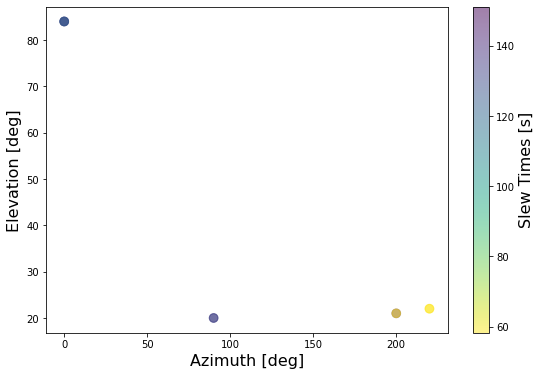

In [108]:
fig = plt.figure(figsize=(9,6))
plt.scatter(df['Start_Azimuth[deg]'], df['Start_Elevation[deg]'], 
            s=75, alpha=0.5, c=df['Slew_time[s]'], label=f'Slew Times', cmap='viridis_r')
plt.colorbar().set_label('Slew Times [s]',fontsize=16)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('Azimuth [deg]',fontsize=16)


## Mount position plot

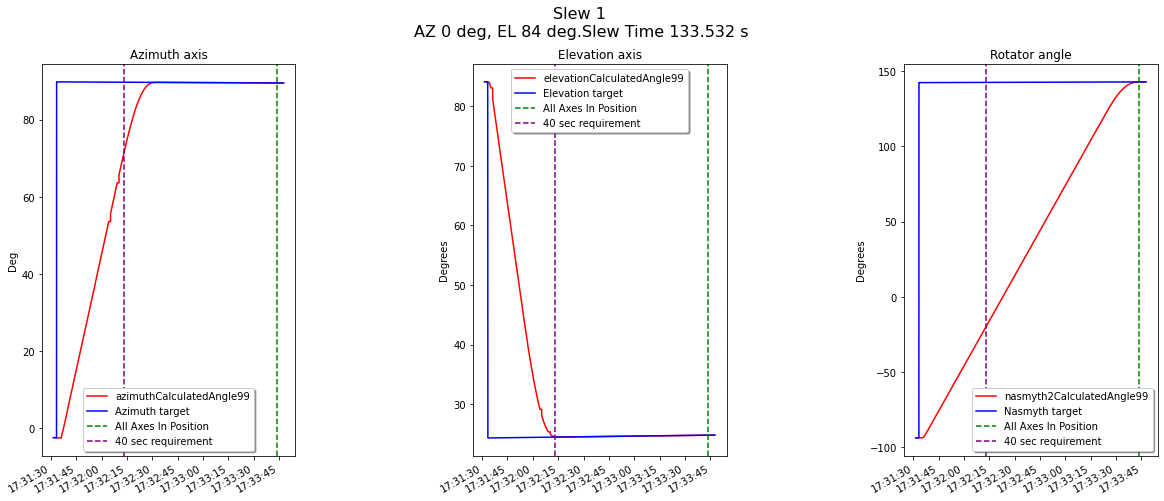

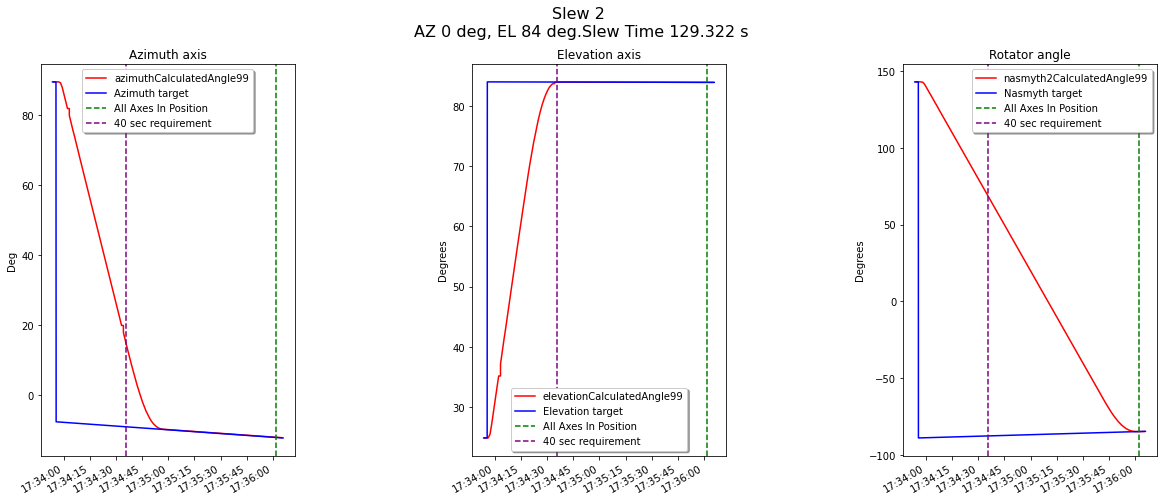

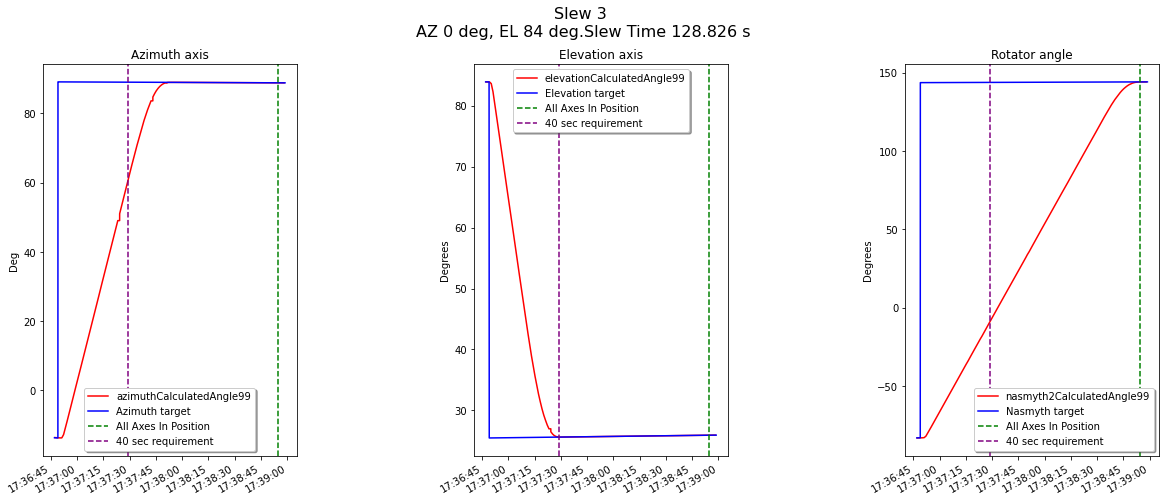

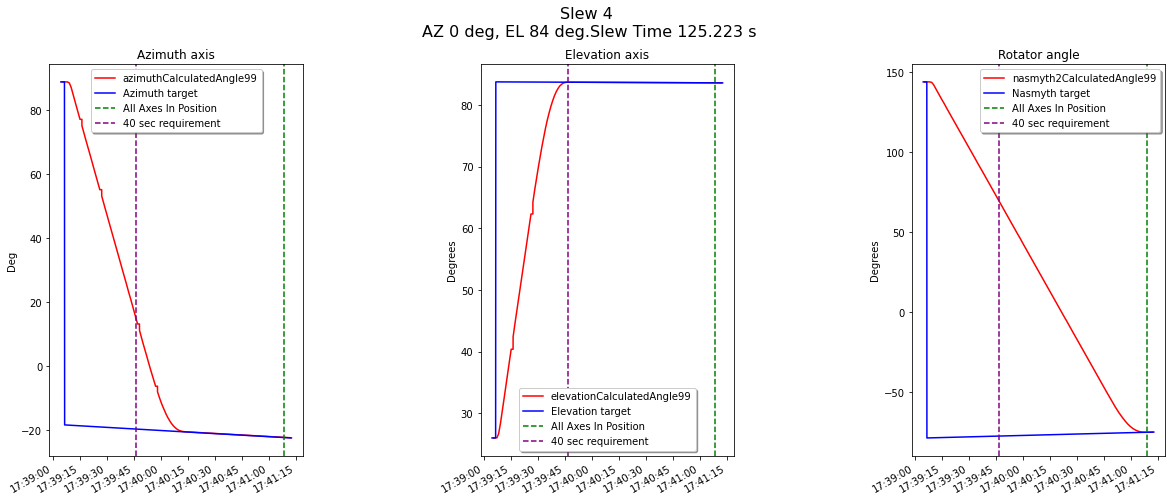

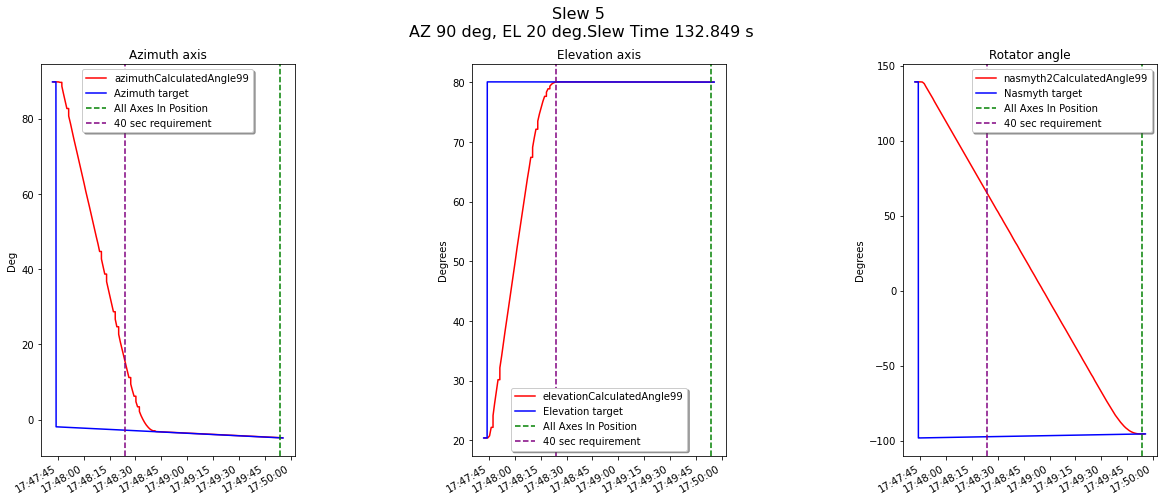

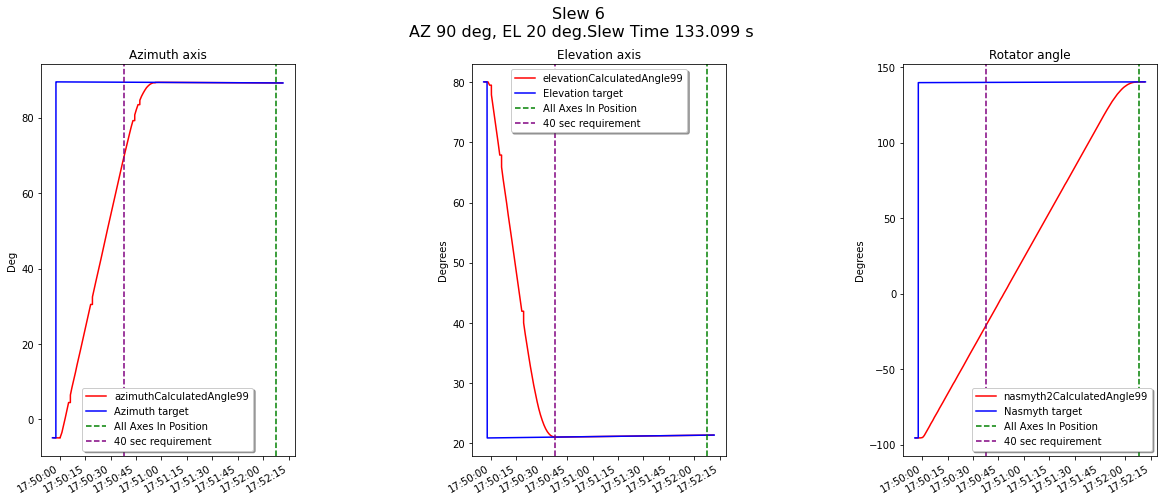

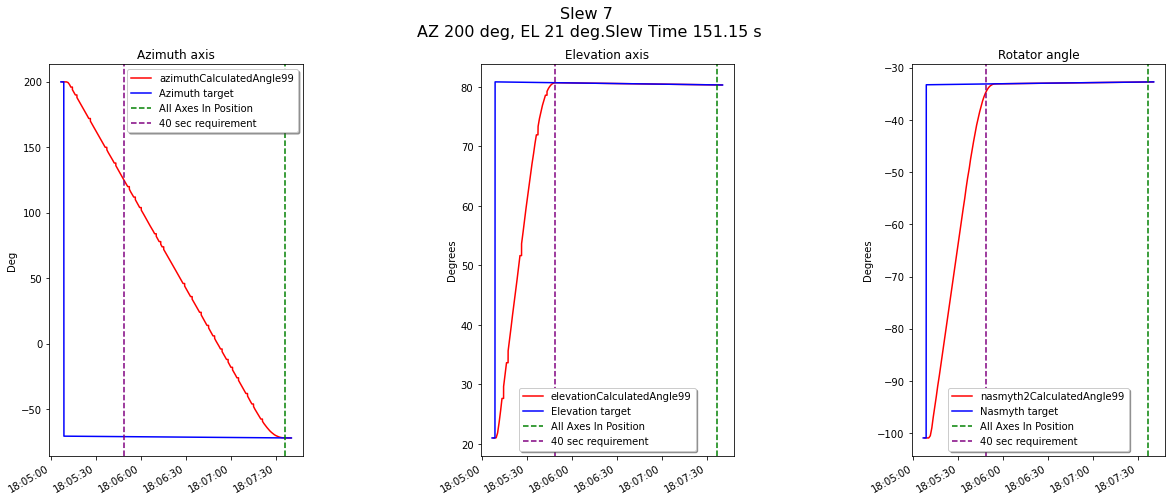

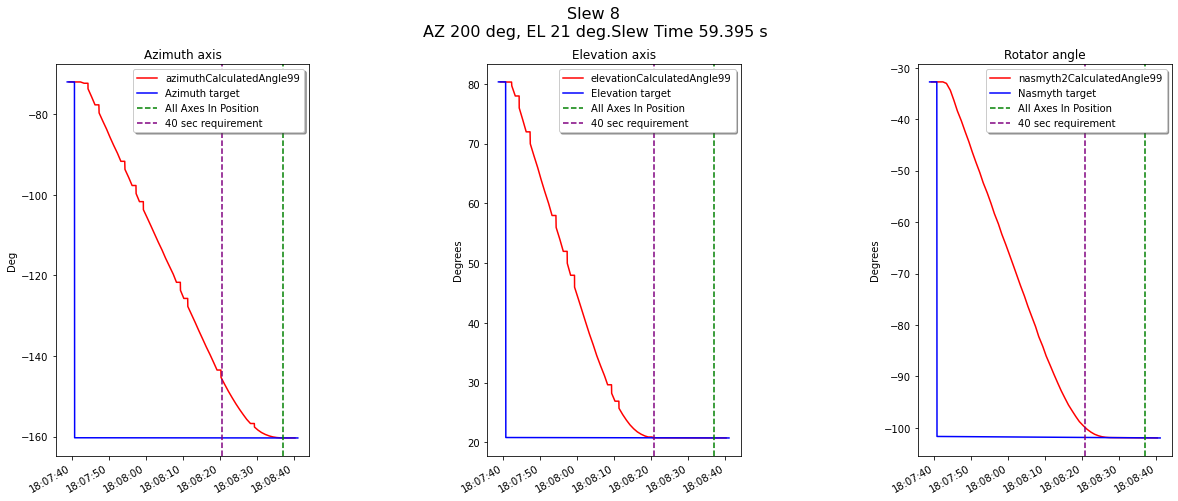

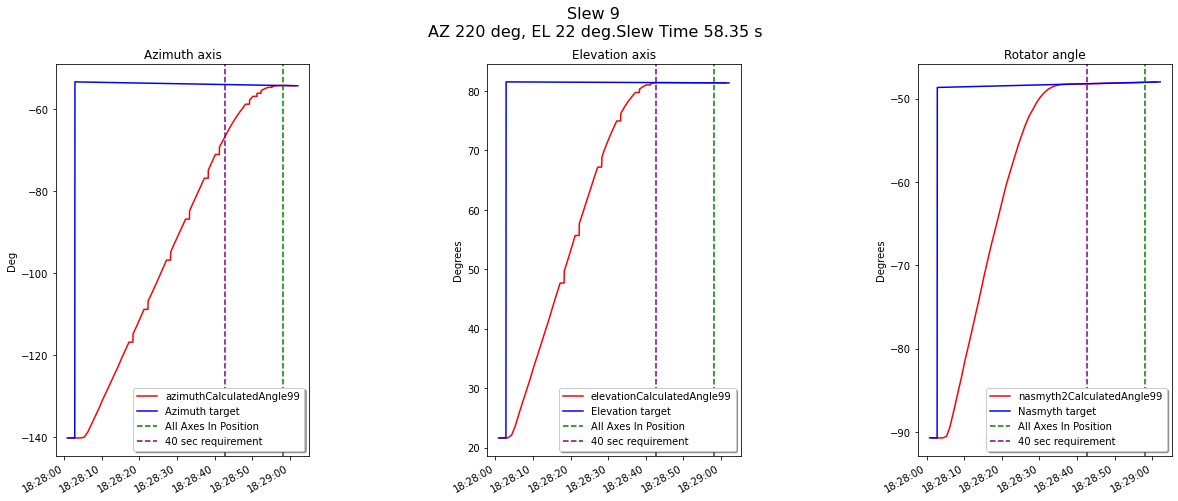

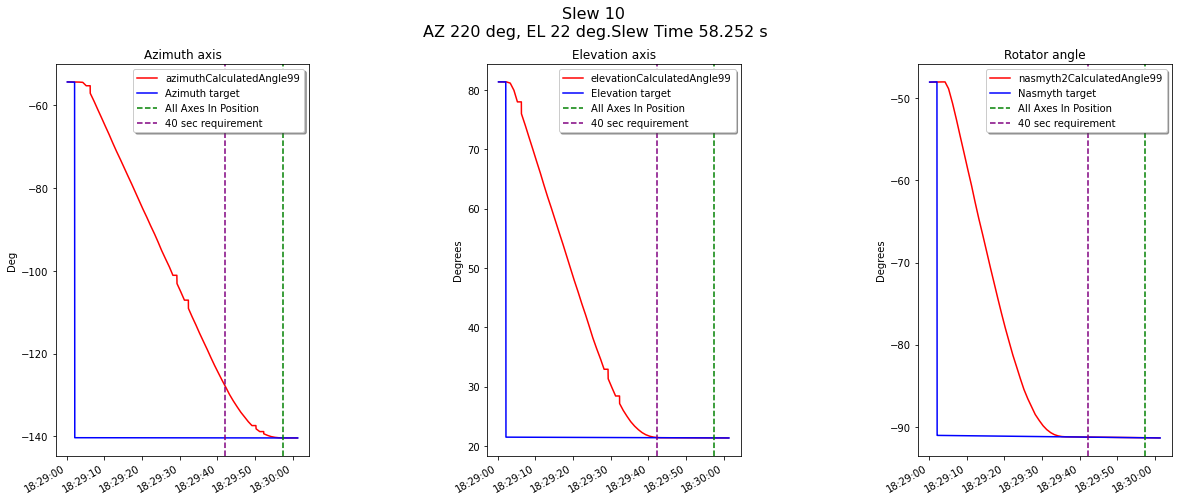

In [146]:
for i in range(len(df)):
    before, after = 2, 1
    t_start = Time(df['Start_Time[UTC]'][i],scale='utc') - TimeDelta(before, format='sec')
    t_end = Time(df['End_Time[UTC]'][i],scale='utc') + TimeDelta(after, format='sec')

    
    # Query EFD to get rotator azimuth, elevation mount positions and target coordinates
    mount = await client.select_time_series("lsst.sal.ATPtg.mountPositions", 
        ["azimuthCalculatedAngle99", "elevationCalculatedAngle99"], 
                                            t_start, t_end)
    target = await client.select_time_series("lsst.sal.ATMCS.command_trackTarget", 
                                            ["azimuth","elevation", "nasmyth2RotatorAngle"],  
                                             t_start, t_end)
    
    nasmyth = await client.select_time_series("lsst.sal.ATMCS.mount_Nasmyth_Encoders", 
                                              ['nasmyth2CalculatedAngle99'],
                                              t_start, t_end)

    # Find all axes in position
    all_axes_in_position = await client.select_time_series(
      'lsst.sal.ATMCS.logevent_allAxesInPosition', ['inPosition'],t_start, t_end)
    inPosition = all_axes_in_position[all_axes_in_position['inPosition']==True] 
    
    # Requirement
    requirement = (Time(df['Start_Time[UTC]'][i],scale='utc') + TimeDelta(
         40, format='sec')).datetime64  
    azimuth = (df['Start_Azimuth[deg]'][i])
    elevation = (df['Start_Elevation[deg]'][i])
    time = df['Slew_time[s]'][i]
    # Plot it
    fig = plt.figure(figsize = (20,8))
    plt.subplots_adjust(wspace=0.7)
    plt.suptitle(f'Slew {i+1} \n'
                  f'AZ {azimuth} deg, EL {elevation} deg.' 
                  f'Slew Time {time} s', 
                  fontsize = 16)
    # Azimuth axis
    plt.subplot(1,3,1)
    ax1 = mount['azimuthCalculatedAngle99'].plot(color='red')
    ax1.plot(target.index, target["azimuth"], label='Azimuth target', 
             color='blue')
    ax1.set_title("Azimuth axis", fontsize=12)
    ax1.axvline(inPosition.index[0], color="green", linestyle="--", 
                label="All Axes In Position")
    ax1.axvline(requirement, 
                color="purple", 
                linestyle="--", 
                label="40 sec requirement")   
    ax1.set_ylabel("Deg")
    ax1.legend(ncol=1, fancybox=True, shadow=True)    

    plt.subplot(1,3,2)
    ax2 = mount['elevationCalculatedAngle99'].plot(legend=False, color='red')
    ax2.plot(target.index, target["elevation"],label='Elevation target', color='blue')
    ax2.set_title("Elevation axis", fontsize=12)
    
    ax2.axvline(inPosition.index[0], color="green", linestyle="--", label="All Axes In Position")
    ax2.axvline(requirement, 
                color="purple", 
                linestyle="--", 
                label="40 sec requirement")
    ax2.set_ylabel("Degrees")
    ax2.legend(ncol=1, fancybox=True, shadow=True)    
    
    # Nasmyth
    plt.subplot(1,3,3)
    ax3 = nasmyth['nasmyth2CalculatedAngle99'].plot(legend=False, color='red')
    ax3.plot(target.index, target["nasmyth2RotatorAngle"],label='Nasmyth target', color='blue')
    ax3.set_title("Rotator angle", fontsize=12)
    ax3.axvline(inPosition.index[0], color="green", linestyle="--", label="All Axes In Position")
    ax3.axvline(requirement, 
                color="purple", 
                linestyle="--", 
                label="40 sec requirement")
    ax3.set_ylabel("Degrees")
    ax3.legend(
          ncol=1, fancybox=True, shadow=True)
    plt.show()




# Conclusions

***
The time spent in a large slew and settle (90 degrees change in azimuth and 60 in elevation) has been examined with slews originating
in four different points in the pointing range: azimuth and elevation (0, 84), (90, 20), (200, 21) and (220,22)  degrees. 

None of these slew tests have met the maximum alloted 40 seconds requirement specified in AuxTel LTS-337-014 (Large Slew and Settle).
The above plots show that the elevation axis meets the requirement, while azimuth and the nasmyth rotator angles (depending on the sky
angles) exceed this large slew and settle alloted time requirement. 